<h2 style="color:#1f77b4;">Live Coding Parte 2</h2>

<h5 style="color:#1f77b4;">1. Importar librerías necesarias (pandas, schedule, datetime)</h5>

In [ ]:
#pip install schedule

In [1]:
import pandas as pd
import requests
from io import StringIO
from datetime import datetime
import schedule
import time

<h5 style="color:#1f77b4;">2. Leer valor del dolar en la Web de SII</h5>

In [2]:
# Leer Web
# https://www.sii.cl/valores_y_fechas/uf/uf2025.htm
url = "https://www.sii.cl/valores_y_fechas/dolar/dolar2025.htm"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers, timeout=30).text
tablas = pd.read_html(
    StringIO(html),
    decimal=",",     # coma = decimal
    thousands=".",   # punto = miles
)

# Ver cuántas tablas y una “vista rápida” de cada una
print("Cantidad de tablas:", len(tablas))
for i, t in enumerate(tablas):
    print(i, t.shape, "->", list(t.columns)[:6])

Cantidad de tablas: 13
0 (11, 6) -> [0, 1, 2, 3, 4, 5]
1 (11, 6) -> [0, 1, 2, 3, 4, 5]
2 (11, 6) -> [0, 1, 2, 3, 4, 5]
3 (11, 6) -> [0, 1, 2, 3, 4, 5]
4 (11, 6) -> [0, 1, 2, 3, 4, 5]
5 (11, 6) -> [0, 1, 2, 3, 4, 5]
6 (11, 6) -> [0, 1, 2, 3, 4, 5]
7 (11, 6) -> [0, 1, 2, 3, 4, 5]
8 (11, 6) -> [0, 1, 2, 3, 4, 5]
9 (11, 6) -> [0, 1, 2, 3, 4, 5]
10 (11, 6) -> [0, 1, 2, 3, 4, 5]
11 (11, 6) -> [0, 1, 2, 3, 4, 5]
12 (32, 13) -> ['Día', 'Ene', 'Feb', 'Mar', 'Abr', 'May']


In [3]:
t = tablas[12].copy()
t

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,NaN,NaN,NaN,953.07,NaN,NaN,933.42,976.80,965.28,962.39,NaN,928.16
1,2,996.46,NaN,NaN,946.28,955.67,941.97,926.62,NaN,968.35,959.19,NaN,927.95
2,3,999.84,984.22,954.22,949.83,NaN,939.65,926.51,NaN,974.13,961.54,943.69,925.37
3,4,NaN,987.12,953.11,946.59,NaN,941.53,927.87,967.48,969.46,NaN,940.53,919.46
4,5,NaN,977.58,948.87,NaN,940.95,936.89,NaN,964.28,971.22,NaN,945.13,918.15
5,6,1011.82,969.47,936.70,NaN,940.18,930.79,NaN,966.02,NaN,963.17,945.60,NaN
6,7,1010.98,967.59,926.52,975.82,939.67,NaN,932.34,976.42,NaN,963.09,940.84,NaN
7,8,1005.85,NaN,NaN,990.68,945.44,NaN,940.28,971.88,964.58,961.61,NaN,NaN
8,9,1007.51,NaN,NaN,993.89,941.22,933.91,945.39,NaN,967.07,951.45,NaN,920.02
9,10,1003.92,960.60,928.25,1000.01,NaN,937.09,948.33,NaN,966.35,948.77,946.24,926.89


<h5 style="color:#1f77b4;">3. Limpiar datos (tipos, nulos, duplicados)</h5>

<p>melt() toma valores que estaban separados en columnas y los organiza en filas, indicando de dónde viene cada uno.</p>

In [5]:
# 1) Formato largo (Day-Month-Value)
meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

df_dolar = t.melt(          # melt() reordena la tabla: una sola columna de valores
    id_vars=["Día"],        # “Día” se mantiene como identificador
    value_vars=meses,       # columnas que se van a ordenar (Ene..Dic)
    var_name="Mes",         # nombre de la nueva columna que guardará el mes
    value_name="Dolar"      # nombre de la nueva columna que guardará el valor
)
df_dolar.head(20)

,Día,Mes,Dolar
0,1,Ene,NaN
1,2,Ene,996.46
2,3,Ene,999.84
3,4,Ene,NaN
4,5,Ene,NaN
5,6,Ene,1011.82
6,7,Ene,1010.98
7,8,Ene,1005.85
8,9,Ene,1007.51
9,10,Ene,1003.92


In [7]:
# 2) Mapa mes -> número
# Ejemplo mental:
# "Ene" → map_mes["Ene"] → 1
# "Dic" → map_mes["Dic"] → 12
map_mes = {"Ene":1,"Feb":2,"Mar":3,"Abr":4,"May":5,"Jun":6,"Jul":7,"Ago":8,"Sep":9,"Oct":10,"Nov":11,"Dic":12}
df_dolar["MesNum"] = df_dolar["Mes"].map(map_mes)
df_dolar.head()

,Día,Mes,Dolar,MesNum
0,1,Ene,NaN,1
1,2,Ene,996.46,1
2,3,Ene,999.84,1
3,4,Ene,NaN,1
4,5,Ene,NaN,1


In [9]:
# 3) Crear fecha (año fijo 2025) y limpiar nulos
df_dolar["Fecha"] = pd.to_datetime(
    {"year": 2025, "month": df_dolar["MesNum"], "day": df_dolar["Día"]},
    errors="coerce"
)
df_dolar.head(20)

,Día,Mes,Dolar,MesNum,Fecha
0,1,Ene,NaN,1,2025-01-01
1,2,Ene,996.46,1,2025-01-02
2,3,Ene,999.84,1,2025-01-03
3,4,Ene,NaN,1,2025-01-04
4,5,Ene,NaN,1,2025-01-05
5,6,Ene,1011.82,1,2025-01-06
6,7,Ene,1010.98,1,2025-01-07
7,8,Ene,1005.85,1,2025-01-08
8,9,Ene,1007.51,1,2025-01-09
9,10,Ene,1003.92,1,2025-01-10


In [10]:
# Eliminar NaN
df_dolar = df_dolar.dropna(subset=["Dolar", "Fecha"]).sort_values("Fecha").reset_index(drop=True)
df_dolar.head()

,Día,Mes,Dolar,MesNum,Fecha
0,2,Ene,996.46,1,2025-01-02
1,3,Ene,999.84,1,2025-01-03
2,6,Ene,1011.82,1,2025-01-06
3,7,Ene,1010.98,1,2025-01-07
4,8,Ene,1005.85,1,2025-01-08


In [11]:
df_dolar.shape

(248, 5)

<h5 style="color:#1f77b4;">4. Gráficar</h5>

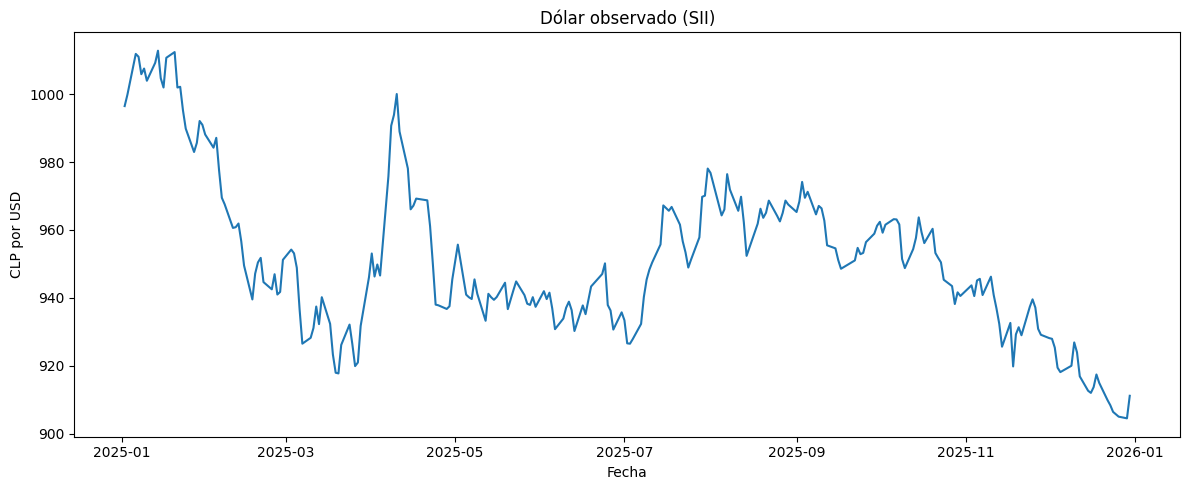

In [12]:
import matplotlib.pyplot as plt

# asegúrate de tener df_dolar con columnas: "Fecha" y "Dolar"
df_plot = df_dolar.dropna(subset=["Fecha", "Dolar"]).sort_values("Fecha")

plt.figure(figsize=(12, 5))
plt.plot(df_plot["Fecha"], df_plot["Dolar"])
plt.title("Dólar observado (SII)")
plt.xlabel("Fecha")
plt.ylabel("CLP por USD")
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import requests
from io import StringIO

def leer_dolar_sii(anio: int):
    url = f"https://www.sii.cl/valores_y_fechas/dolar/dolar{anio}.htm"
    headers = {"User-Agent": "Mozilla/5.0"}

    html = requests.get(url, headers=headers, timeout=30).text

    tablas = pd.read_html(
        StringIO(html),
        decimal=",",
        thousands="."
    )

    # tabla "principal" (la más grande)
    t = max(tablas, key=lambda df: df.shape[0] * df.shape[1]).copy()

    meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

    df_dolar = t.melt(
        id_vars=["Día"],
        value_vars=meses,
        var_name="Mes",
        value_name="Dolar"
    )

    map_mes = {"Ene":1,"Feb":2,"Mar":3,"Abr":4,"May":5,"Jun":6,"Jul":7,"Ago":8,"Sep":9,"Oct":10,"Nov":11,"Dic":12}
    df_dolar["MesNum"] = df_dolar["Mes"].map(map_mes)

    df_dolar["Fecha"] = pd.to_datetime(
        {"year": anio, "month": df_dolar["MesNum"], "day": df_dolar["Día"]},
        errors="coerce"
    )

    df_dolar = df_dolar.dropna(subset=["Fecha", "Dolar"]).sort_values("Fecha").reset_index(drop=True)
    return df_dolar[["Fecha", "Dolar"]]

df_dolar_2025 = leer_dolar_sii(2025)
df_dolar_2025.head()

,Fecha,Dolar
0,2025-01-02,996.46
1,2025-01-03,999.84
2,2025-01-06,1011.82
3,2025-01-07,1010.98
4,2025-01-08,1005.85


In [14]:

df_dolar_2024 = leer_dolar_sii(2024)
df_dolar_2024.head()

,Fecha,Dolar
0,2024-01-02,877.12
1,2024-01-03,880.92
2,2024-01-04,884.39
3,2024-01-05,884.45
4,2024-01-08,893.07


In [15]:
df_dolar_2023 = leer_dolar_sii(2023)

In [16]:
df_dolar_2026 = leer_dolar_sii(2026)

df_dolar_vf = pd.concat([
    df_dolar_2023.assign(Anio=2023),
    df_dolar_2024.assign(Anio=2024),
    df_dolar_2025.assign(Anio=2025),
    df_dolar_2026.assign(Anio=2026),
], ignore_index=True)

df_dolar_vf.head()


,Fecha,Dolar,Anio
0,2023-01-03,855.86,2023
1,2023-01-04,852.14,2023
2,2023-01-05,855.10,2023
3,2023-01-06,856.31,2023
4,2023-01-09,846.38,2023


In [17]:
df_dolar_vf["Anio"].unique()

array([2023, 2024, 2025, 2026])

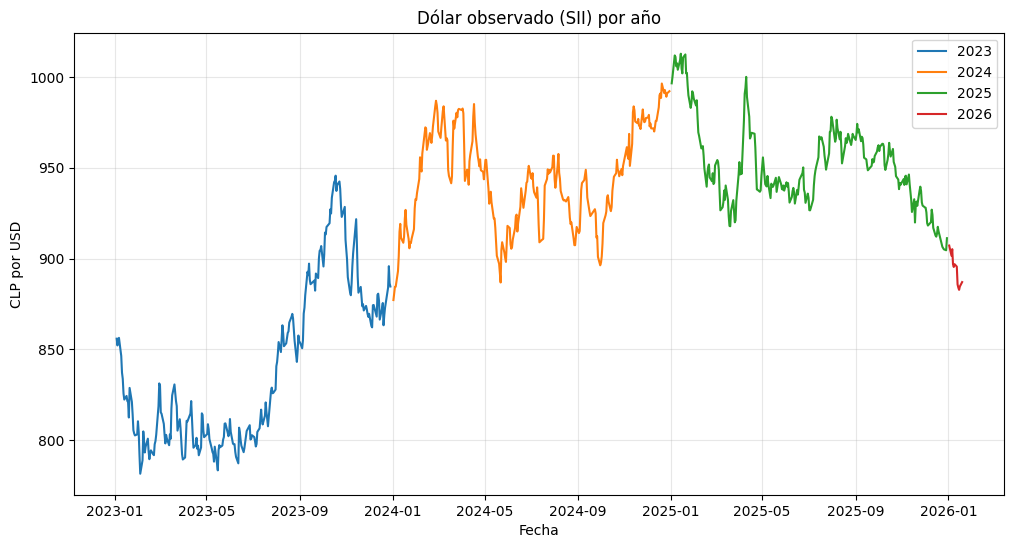

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for anio, g in df_dolar_vf.sort_values("Fecha").groupby("Anio"):
    plt.plot(g["Fecha"], g["Dolar"], label=str(anio))

plt.title("Dólar observado (SII) por año")
plt.xlabel("Fecha")
plt.ylabel("CLP por USD")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
